# <center>EEG signal processing - basics</center>

### Exercises

#### Importing Data
1. Get the EEG/MEG dataset from https://mne.tools/0.11/auto_tutorials/plot_introduction.html?highlight=eeg#access-raw-data
2. Import data using standard import functions

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

/Users/sreedevs/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [50]:
raw = mne.io.Raw(raw_fname)
info = raw.info
print(info)
print(raw)

Opening raw data file /Users/sreedevs/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2002-1

#### Checking data structures
3. What are the various information in the data?
<p>Printing raw file gives information about SSP projector calculated to remove environmental noise from the MEG signals, plus a projector to mean reference the EEG channels. Which are represented as PCA components</p>
<p>Just by printing the loaded raw file some information can be obtained. It shows 376(number of channels) x 41700 (no of times) (277.7 sec), and approximate size is 3.6 MB </p>

4. How are they structured?
<p>info : dict <br> ch_names : list of str <br> n_times : int <br> times : ndarray (numpy array)</p>
5. Can you extract each of them separately? How?
<p>Various methods are defined for the RAW class. Using these methods we can extract the data. Example is shown in exercise 6, printing the channel names</p>
<p>For example we can also show selecting eog channel by indices and plotting it</p>

(1, 41700)
(41700,)


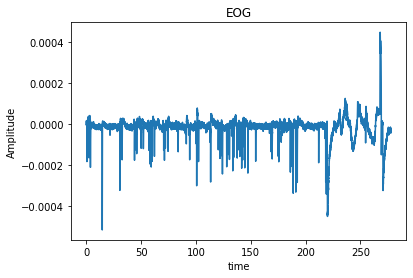

In [47]:
eog_channel_indices = mne.pick_types(raw.info, meg=False, eeg=False, eog= True)
eog_data, times = raw[eog_channel_indices]
x = plt.plot(times, eog_data[0])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title("EOG")
plt.show()

6. Can you list all the channel names? 
7. List only all EEG channel labels?

In [48]:
#All the channel Names
print(raw.ch_names)

meg_ch = [x for x in raw.ch_names if x.startswith('MEG')]

eeg_ch = [x for x in raw.ch_names if x.startswith('EEG')]

eog_ch = [x for x in raw.ch_names if x.startswith('EOG')]

sti_ch = [x for x in raw.ch_names if x.startswith('STI')]

channel_name = ['MEG','EEG','STI','EOG']
channel_length = [len(meg_ch),len(eeg_ch),len(sti_ch),len(eog_ch)]

print("Total number of channels {}".format(len(raw.ch_names)))
x = [print("Number of {} channels {}".format(x,y)) for x,y in zip(channel_name, channel_length)]

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

In [49]:
#EEG Channels
print('\n'.join(eeg_ch))

EEG 001
EEG 002
EEG 003
EEG 004
EEG 005
EEG 006
EEG 007
EEG 008
EEG 009
EEG 010
EEG 011
EEG 012
EEG 013
EEG 014
EEG 015
EEG 016
EEG 017
EEG 018
EEG 019
EEG 020
EEG 021
EEG 022
EEG 023
EEG 024
EEG 025
EEG 026
EEG 027
EEG 028
EEG 029
EEG 030
EEG 031
EEG 032
EEG 033
EEG 034
EEG 035
EEG 036
EEG 037
EEG 038
EEG 039
EEG 040
EEG 041
EEG 042
EEG 043
EEG 044
EEG 045
EEG 046
EEG 047
EEG 048
EEG 049
EEG 050
EEG 051
EEG 052
EEG 053
EEG 054
EEG 055
EEG 056
EEG 057
EEG 058
EEG 059
EEG 060


8. How are the data structure of channel labels different from the time series?
<p>Channel labels are list of strings, where as time series is ndarray</p>

9. Can you find any meta information about the data?
<p><b>mne.info()</b> is a class, which include a  datastructure made out of available python data types. Channel names, channel list are stored as list. And proper data types are used to represent other fields.</p>
<p>Printing info gives a lot of information about the raw data. Including channel names, bad channels, channel list, device to head transformation, digitization, info about project (project name, subject info etc), filtering done, etc </p>

10. What were the filters already applied in the data during recording?
<p>High pass filtering at 0.1 Hz <br>Low pass filtering at 40 Hz.<br>So the signal is band pass, having frequency components from 0.1 Hz to 40 Hz</p>
11. Do you find something like channel type? What are the types in your signal?
<p>Channel types represents the data that channel contains. Various channel types in this data are MEG, EEG, STI, EOG</p>

#### Plotting RAW data
12. Plot the raw data - grouped by  channel type (MEG, EEG, STI channels) - How do they look?
13. What is the typical amplitude of different channel types?
14. Do you find any large fluctuations? If yes, what is the probable source?
15. Can you find and plot the ECG/EOG channels?
16. How does the STI channel differ from other channels?
17. Can you find an STI channel? What is it?